In [2]:
import numpy as np
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [5, 3.5]
matplotlib.rcParams['figure.dpi'] = 200

In [1]:
fname = "data/spp_fld_l1_rfs_waveform_20211103_v00.txt"
raw = open(fname,'r').read()
raw = raw[raw.rfind('Variable Data:'):]
raw = raw.split('Record #')[1:]

In [3]:
dd = eval("{"+",".join(raw)+"}")
dd = [np.array(dd[i+1]) for i in range(8) ]

In [4]:
rate=38.4e6
N = len(dd[2])
def Pk(data, pad=False):
    if pad:
        data= np.hstack((np.hanning(N)*data,np.zeros(N)))
        ret = np.abs(np.fft.rfft(data)**2)
        freq = rate/N*np.arange(len(ret))/2
    else:
        ret = np.abs(np.fft.rfft(data)**2)
        freq = rate/N*np.arange(len(ret))

    return freq,ret

In [5]:
x=np.arange(N)
y = 100*np.sin(128/N*x*2*np.pi)
f,r = Pk(dd[1])
f,r2 = Pk(y)

2684354560000.0
[5.68292459e-32 6.02988834e-32 6.24138944e-32 6.93080606e-32
 8.67140760e-32 8.87310471e-32 1.15147431e-31 1.30104337e-31
 1.46042207e-31 1.87358458e-31 2.34268648e-31 2.74844825e-31
 3.71867781e-31 4.67623119e-31 6.68300353e-31 9.64265578e-31
 1.52455697e-30 2.72455084e-30 6.11716563e-30 2.47393822e-29
 1.00000000e+00 2.50801673e-29 6.29042700e-30 2.83177336e-30
 1.62387517e-30 1.03079470e-30 7.22186232e-31 5.25860137e-31
 4.21973519e-31 3.18912453e-31 2.76842682e-31 2.20490768e-31
 1.77584788e-31 1.58680467e-31 1.45296977e-31 1.14342812e-31
 1.10221931e-31 8.84596568e-32 9.01380782e-32 7.81299863e-32]


(1e-06, 1.5)

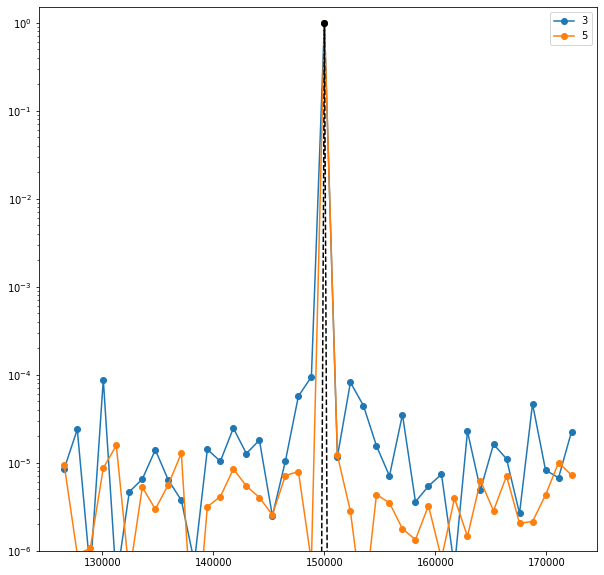

In [6]:
plt.figure(figsize=(10,10))
Nc=256
D= 20
for i in range(1,60):
    d=np.copy(r[i*128-D:i*128+D])
    d/=d.max()
    if d[:10].mean()<2e-5:
        plt.plot(f[128-D:128+D],d,'o-',label=str(i))
d=np.copy(r2[128-D:128+D])
print(r2[128])
d/=d.max()
print(d)
plt.plot(f[128-D:128+D],d,'ko--')
plt.legend()

            
plt.semilogy()  
plt.ylim(1e-6,1.5)
#plt.plot(f[240:270],r2[240:270]*1e4,'ro-')
#plt.plot(f[240:270],r[120*240-15:120*2],'go-')


Text(0, 0.5, 'Power')

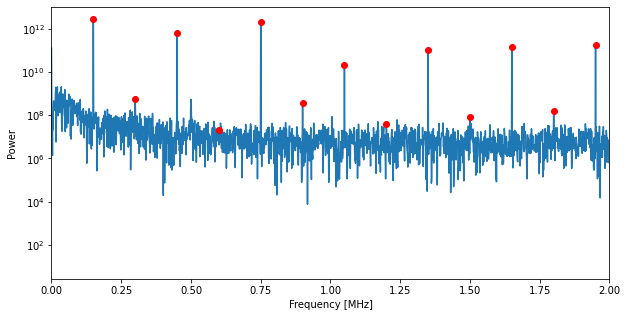

In [7]:
plt.figure(figsize=(10,5))
plt.plot(f/1e6,r)
plt.plot(f[128::128]/1e6, r[128::128],'ro')
plt.semilogy()
plt.xlim(0,2)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power')

[]

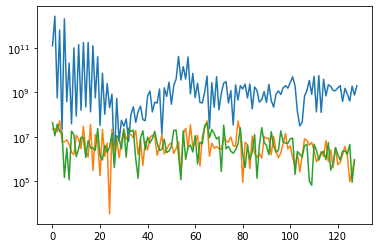

In [8]:
plt.plot(r[::128])
plt.plot(r[2::128])
plt.plot(r[126::128])
plt.semilogy()

[]

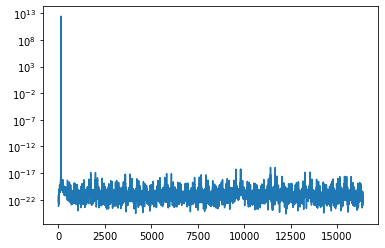

In [9]:
plt.plot(r2)
plt.semilogy()

In [10]:
d=r2[118:138]

In [11]:
d

array([6.28860113e-19, 7.37780960e-19, 9.98224972e-19, 1.25526625e-18,
       1.79395510e-18, 2.58843070e-18, 4.09245146e-18, 7.31366048e-18,
       1.64206415e-17, 6.64092734e-17, 2.68435456e+12, 6.73240614e-17,
       1.68857364e-17, 7.60148372e-18, 4.35905672e-18, 2.76701846e-18,
       1.93860390e-18, 1.41159506e-18, 1.13272654e-18, 8.56074096e-19])

In [12]:
d/=d.max()

Text(0, 0.5, 'frequency')

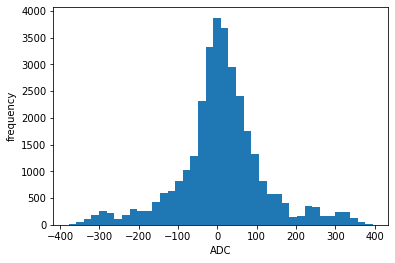

In [13]:
_=plt.hist (dd[1],bins=40)
plt.xlabel("ADC")
plt.ylabel("frequency")

Text(0, 0.5, 'ADC')

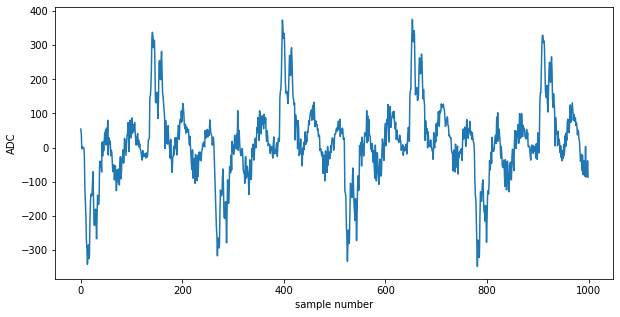

In [14]:
plt.figure(figsize=(10,5))
plt.plot(dd[1][:1000])
plt.xlabel('sample number')
plt.ylabel('ADC')

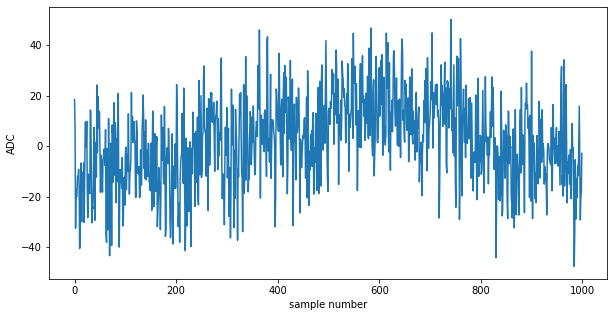

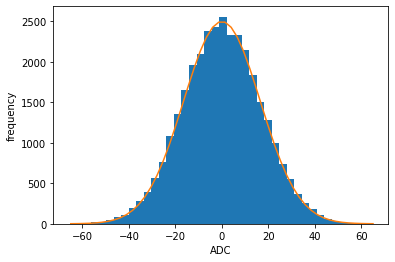

In [15]:
a=np.fft.rfft(dd[1])
a[::128]=0.0
a=np.fft.irfft(a)
plt.figure(figsize=(10,5))
plt.plot(a[:1000])
plt.xlabel('sample number')
plt.ylabel('ADC')
plt.figure()
_=plt.hist (a,bins=40)
plt.xlabel("ADC")
plt.ylabel("frequency")
x=np.linspace(-65,65)
plt.plot(x,np.exp(-x**2/(2*16.5**2))*2500)

In [16]:
pp =[Pk(d)[1] for d in dd]
mpk=np.mean(pp,axis=0)
mpk[::128]=np.nan

Text(0, 0.5, 'power')

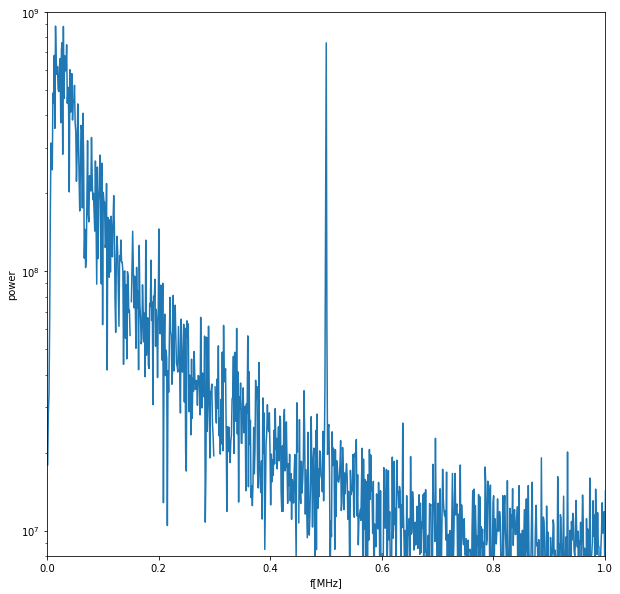

In [17]:
plt.figure(figsize=(10,10))
plt.plot(f/1e6,mpk)
plt.semilogy()
#plt.xlim(17,19.5); plt.ylim(0.8e6,2e7)
plt.xlim(0,1); plt.ylim(0.8e7,1e9)
plt.xlabel('f[MHz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

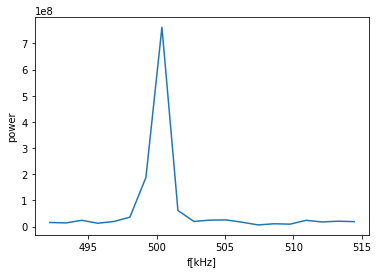

In [18]:
plt.plot(f[420:440]/1e3,mpk[420:440])
plt.xlabel('f[kHz]')
plt.ylabel('power')

In [78]:
def shift(d,N):
    return np.hstack((d[N:],d[0:N]))

def stack_shift(d,L=256, ref=None):
    if len(d)%L!=0:
        d=d[:(len(d)//L)*L]
    s = d.reshape((-1,L)).mean(axis=0)
    if ref is not None:
        imax = np.argmax([np.dot(shift(s,i),ref) for i in range(L)])
        s=shift(s,imax)
    return s


Text(0, 0.5, 'signal [ADC]')

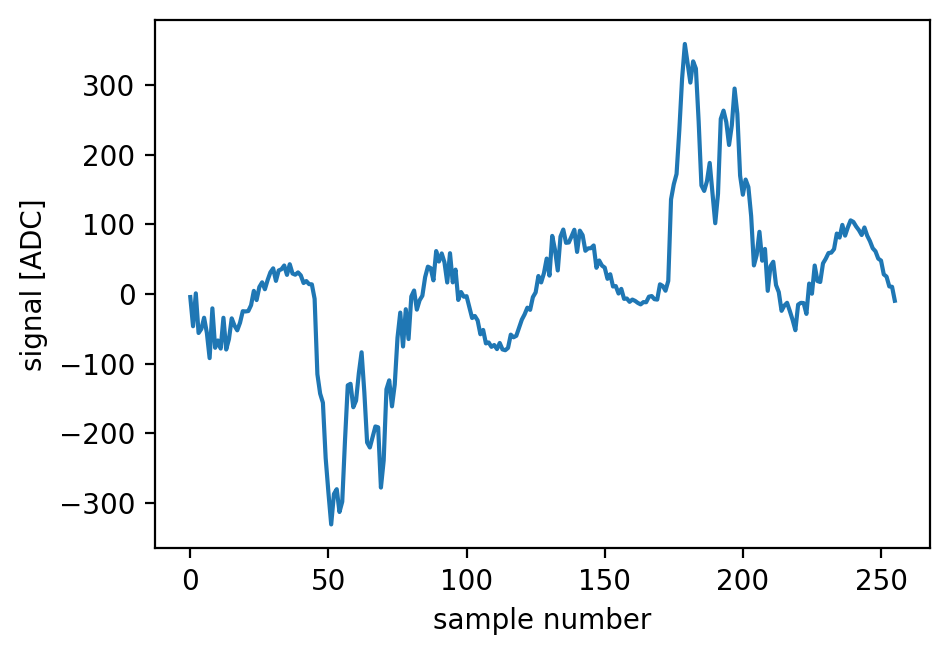

In [126]:
ref=stack_shift(dd[0])
for dx in dd[1:]:
    cs = stack_shift(dx,ref=ref)
    #plt.plot(cs)
    ref += cs
ref/=len(dd)
plt.plot(ref)
plt.xlabel('sample number')
plt.ylabel('signal [ADC]')

In [129]:
f,p,pc = np.loadtxt('psp_pf.txt').T

[]

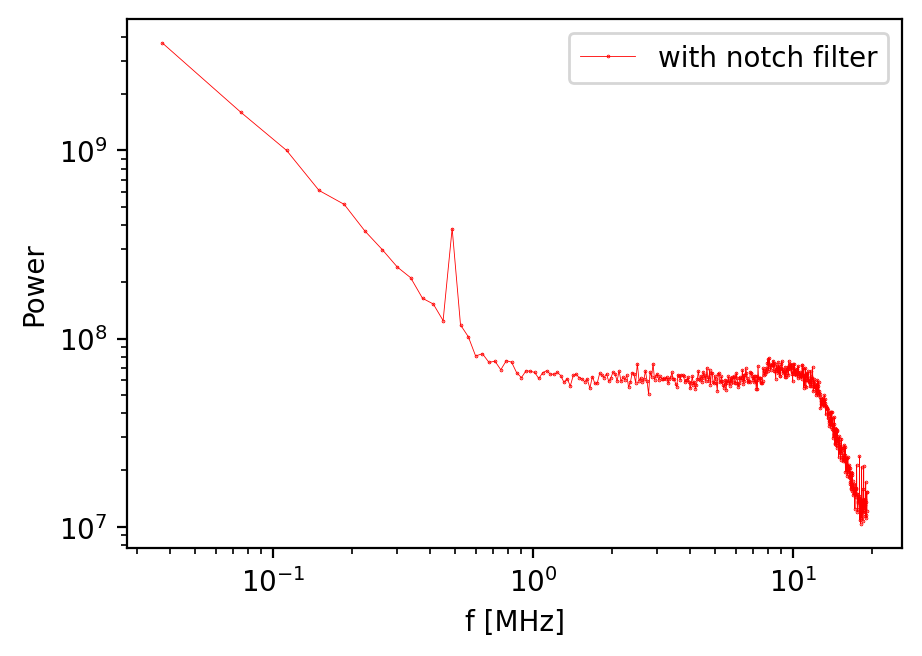

In [139]:
plt.plot(f,p,'bo-',label='without notch filter',lw=0.3,markersize=0.3)
plt.plot(f,pc,'ro-',label='with notch filter',lw=0.3, markersize=0.3)
plt.xlabel('f [MHz]')
plt.ylabel('Power')
plt.legend()

#plt.semilogy()
plt.loglog()

(-1.5, 1.5)

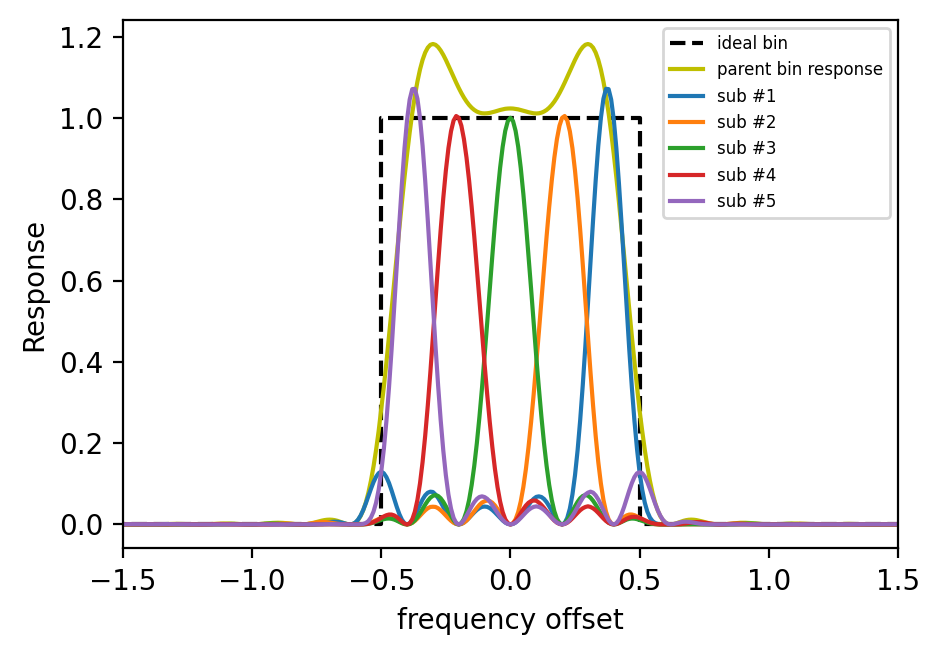

In [172]:
N=5
from scipy.integrate import simpson
r = np.loadtxt(f'respz{N}.dat')
for i in range(1,r.shape[1]):
    r[:,i]/=simpson(r[:,i],r[:,0])
    
plt.plot([-2,-0.5,-0.5,0.5,0.5,2],[0,0,1,1,0,0],'k--',label = 'ideal bin')
plt.plot(r[:,0],r[:,1],'y-',label='parent bin response')
for i in range(N):
    plt.plot(r[:,0],r[:,2+N+i]/N,label=f'sub #{i+1}')
plt.xlabel('frequency offset')
plt.ylabel('Response')
plt.legend(fontsize=6)
plt.xlim(-1.5,+1.5)
